In [372]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [373]:
patients=pd.read_csv('patients.csv')
treatment=pd.read_csv('treatments.csv')
adverse=pd.read_csv('adverse_reactions.csv')
treatment_cut=pd.read_csv('treatments_cut.csv')

In [374]:
print(patients.shape)
print(treatment.shape)
print(adverse.shape)
print(treatment_cut.shape)

(503, 14)
(280, 7)
(34, 3)
(70, 7)


In [375]:
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [376]:
patients.tail()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341.0,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110.0,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109.0,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7
502,503,male,Pat,Gersten,2778 North Avenue,Burr,Nebraska,68324.0,United States,PatrickGersten@rhyta.com402-848-4923,5/3/1954,138.2,71,19.3


In [377]:
patients[patients.duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi


In [378]:
patients[patients['address'].duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [379]:
patients_copy[patients_copy['address'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email_id,phone_number
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,1950-08-14,143.4,62,26.2,NaN,NaN
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,1978-04-09,237.8,69,35.1,NaN,NaN
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,1976-09-23,165.9,63,29.4,NaN,NaN
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,1936-04-07,199.5,65,33.2,NaN,NaN
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,1957-02-25,205.3,74,26.4,NaN,NaN
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,1951-10-30,146.5,69,21.6,NaN,NaN
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,1995-05-17,231.7,69,34.2,NaN,NaN
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,1989-11-03,158.6,63,28.1,NaN,NaN
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,1937-10-09,175.2,61,33.1,NaN,NaN
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,1962-12-16,124.3,69,18.4,NaN,NaN


In [380]:
patients_copy[patients_copy['address'].duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email_id,phone_number
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771,United States,1985-08-01,155.8,67,24.4,JakobCJakobsen@einrot.com,845-858-7707
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,1978-04-09,237.8,69,35.1,NaN,NaN
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,1976-09-23,165.9,63,29.4,NaN,NaN
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,1936-04-07,199.5,65,33.2,NaN,NaN
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,1957-02-25,205.3,74,26.4,NaN,NaN
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,1951-10-30,146.5,69,21.6,NaN,NaN
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,1995-05-17,231.7,69,34.2,NaN,NaN
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,1989-11-03,158.6,63,28.1,NaN,NaN
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,1937-10-09,175.2,61,33.1,NaN,NaN
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,1962-12-16,124.3,69,18.4,NaN,NaN


In [381]:
patients.sample(10)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6
133,134,female,Elisabeth,Dimmen,3180 Still Pastures Drive,Columbia,SC,29210.0,United States,ElisabethDimmen@cuvox.de+1 (803) 465-3312,4/21/1985,199.5,65,33.2
434,435,female,Bao,She,1956 Rosemont Avenue,Anaheim,CA,92801.0,United States,BaoShe@rhyta.com+1 (323) 209-0527,1/29/1931,193.8,63,34.3
340,341,female,Minea,Lindgren,2272 Williams Avenue,Palmdale,California,93550.0,United States,661-265-8708MineaLindgren@jourrapide.com,1/10/1940,176.9,64,30.4
429,430,female,Kristiina,Hyypiä,206 Eagle Lane,Grand Forks,MN,58203.0,United States,KristiinaHyypia@cuvox.de218-773-9682,5/2/1922,152.1,65,25.3
474,475,female,Esperanza,Labrosse,1370 Flint Street,Atlanta,GA,30303.0,United States,EsperanzaLabrosse@armyspy.com678-263-3564,10/7/1961,181.5,63,32.1
109,110,male,Stephen,Mayberry,3063 School House Road,Hattiesburg,MS,39402.0,United States,601-699-4153StephenFMayberry@jourrapide.com,9/1/1934,166.1,72,22.5
415,416,female,Mgbeke,Ekwueme,1589 Roosevelt Wilson Lane,Diamond Bar,CA,91765.0,United States,909-861-4356MgbekeEkwueme@cuvox.de,3/14/1954,206.8,65,34.4
51,52,female,Noe,Aranda,3977 Jail Drive,Davenport,Illinois,52801.0,United States,NoeArandaGranado@dayrep.com1 309 912 9553,8/7/1938,107.1,63,19.0
416,417,male,Dani,Antoun,2595 Feathers Hooves Drive,Westbury,New York,11590.0,United States,631-664-4813DaniMuhsinAntoun@armyspy.com,5/7/1928,138.6,70,19.9


In [382]:
patients[patients['contact'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [383]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null object
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null object
zip_code        491 non-null float64
country         491 non-null object
contact         491 non-null object
birthdate       503 non-null object
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [384]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [385]:
treatment[treatment.duplicated()]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
136,joseph,day,29u - 36u,-,7.7,7.19,NaN


In [386]:
treatment[treatment['given_name']=='joseph']

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
10,joseph,day,29u - 36u,-,7.7,7.19,NaN
136,joseph,day,29u - 36u,-,7.7,7.19,NaN


In [387]:
treatment[treatment['hba1c_start'].isnull()]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change


In [388]:
treatment[treatment['hba1c_end'].isnull()]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change


In [389]:
treatment.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [390]:
treatment.tail()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
275,albina,zetticci,45u - 51u,-,7.93,7.73,0.20
276,john,teichelmann,-,49u - 49u,7.90,7.58,NaN
277,mathea,lillebø,23u - 36u,-,9.04,8.67,0.37
278,vallie,prince,31u - 38u,-,7.64,7.28,0.36
279,samúel,guðbrandsson,53u - 56u,-,8.00,7.64,0.36


In [391]:
treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
given_name      280 non-null object
surname         280 non-null object
auralin         280 non-null object
novodra         280 non-null object
hba1c_start     280 non-null float64
hba1c_end       280 non-null float64
hba1c_change    171 non-null float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [392]:
treatment_cut.describe()

,hba1c_start,hba1c_end,hba1c_change
count,70.000000,70.000000,42.000000
mean,7.838000,7.443143,0.518810
std,0.423007,0.418706,0.270719
min,7.510000,7.020000,0.280000
25%,7.640000,7.232500,0.340000
50%,7.730000,7.345000,0.370000
75%,7.860000,7.467500,0.907500
max,9.910000,9.460000,0.970000


In [393]:
adverse.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


In [394]:
adverse.tail()

,given_name,surname,adverse_reaction
29,alex,crawford,hypoglycemia
30,monika,lončar,hypoglycemia
31,steven,roy,headache
32,cecilie,nilsen,hypoglycemia
33,krisztina,magyar,hypoglycemia


In [395]:
adverse[adverse.duplicated()]

,given_name,surname,adverse_reaction


In [396]:
adverse[adverse['adverse_reaction'].isnull()]

,given_name,surname,adverse_reaction


In [397]:
adverse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
given_name          34 non-null object
surname             34 non-null object
adverse_reaction    34 non-null object
dtypes: object(3)
memory usage: 944.0+ bytes


In [398]:
adverse.describe()

,given_name,surname,adverse_reaction
count,34,34,34
unique,34,33,6
top,jia li,johnson,hypoglycemia
freq,1,2,19


### Quality

[Completeness, Validity, Accuracy, Consistency]

#### `Patients`

- Zip code col is stored in decimal format V]
- Certain zip codes of 4 digits [V]  
- For the state col sometimes full names are use and other times short forms are used [IC]
- Missing values for contact details of 12 patients [C]
- Incorrect data types for assigned_sex and birthdate cols [IC]  
- Erroneous data for weights and heights [Accuracy]
- Inconsistent way of storing phone numbers in contact col [IC]  
- Duplicate and not useful data in dataset [IC]

#### `Treatments`

- hba1c_change col has missing values [C]  
- Novodra and Auralin cols has u attached to numbers [V]  
- Only 280 rows are there, instead of 350 [C] 
- Name and surname col is in lower case [IC]   
- Incorrect data type for auralin and novadra cols [V]
- hba1c_change 9 instead of 4 [A] 
- use of dashes instead of Nan in aurolin and novodra cols [IC]  
- duplicated row [IC] 

#### `Adverse Reactions`

- Name and surname col is in lower case [IC]  

### Tidiness

[Completeness, Validity, Accuracy, Consistency]

#### `Patients`

- Phone and email together in one col i.e. contact [IC]

#### `Treatments`

- 3 variables stored in auralin and novodra cols [IC]

#### `Adverse Reactions`

- No point of using this table [IC]


# Cleaning Data

You should follow the order provided below:

- Completeness Issues
- Tidiness Issues
- Remaining Data quality issues like validity, accuracy and consistency

### Steps involved in Data cleaning

- Define
- Code 
- Test

`Always make sure to create a copy of your pandas dataframe before you start the cleaning process`

In [399]:
# Creating copies

patients_copy=patients.copy()
treatment_copy=treatment.copy()
adverse_copy=adverse.copy()
treatment_cut_copy=treatment_cut.copy()

## a. Completeness Issues

- Missing values for contact details of 12 patients
- Only 280 rows are there, instead of 350
- hba1c_change col has missing values

####  Define: Missing values for contact details of 12 patients

`Solution`: There is no way we can retrieve lost contact information nor a way to infer the details, so we don't have any choice other than to reject it.  

####  Define: Only 280 rows are there, instead of 350
`Solution`: We have another DataFrame treatment_cut which contains the missing 70 columns. We will have to append it this dataframe.

#### Code

In [400]:
treatment_copy=pd.concat([treatment_copy,treatment_cut_copy],ignore_index=True)

#### Test

In [401]:
treatment_copy

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
...,...,...,...,...,...,...,...
345,rovzan,kishiev,32u - 37u,-,7.75,7.41,0.34
346,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.95
347,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
348,berta,napolitani,-,42u - 44u,7.68,7.21,NaN


####  Define: hba1c_change col has missing values
`Solution`: Subtract hba1c_start from hba1c_end to get hba1c_change

#### Code

In [402]:
treatment_copy['hba1c_change']=treatment_copy['hba1c_start']-treatment_copy['hba1c_end']

#### Test

In [403]:
treatment_copy.info()

treatment_copy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
given_name      350 non-null object
surname         350 non-null object
auralin         350 non-null object
novodra         350 non-null object
hba1c_start     350 non-null float64
hba1c_end       350 non-null float64
hba1c_change    350 non-null float64
dtypes: float64(3), object(4)
memory usage: 19.3+ KB


,hba1c_start,hba1c_end,hba1c_change
count,350.000000,350.000000,350.000000
mean,7.956343,7.560057,0.396286
std,0.545328,0.545456,0.059283
min,7.500000,7.010000,0.200000
25%,7.650000,7.270000,0.350000
50%,7.785000,7.400000,0.390000
75%,7.950000,7.557500,0.440000
max,9.950000,9.580000,0.540000


## b. Tidiness Issues

- Phone + email in contact col `patients`
- Novodra and Aurolin col `treatment`
- Merge the `adverse` table to `treatment` table

#### Define:  Novodra and Aurolin occupies separate columns with 'u' suffux
`Solution`: Create a new column named treatment for the type of medicine prescribed using the melt function

#### Code

In [404]:
treatment_copy=pd.melt(treatment_copy, id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'],
                           var_name='treatment', value_name='dose')
treatment_copy=treatment_copy[treatment_copy['dose']!='-']
treatment_copy['lower_dosage'],treatment_copy['upper_dosage']=treatment_copy['dose'].str.split('-').str
treatment_copy.drop(columns={'dose'},inplace=True)
treatment_copy['lower_dosage']=pd.to_numeric(treatment_copy.lower_dosage.str.extract(pat = '([0-9].)',expand=False))
treatment_copy['upper_dosage']=pd.to_numeric(treatment_copy.upper_dosage.str.extract(pat = '([0-9].)',expand=False))



#### Test

In [405]:
treatment_copy.sample(5)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,lower_dosage,upper_dosage
421,hugo,collins,8.00,7.53,0.47,novodra,53,55
310,trifon,izmailov,7.68,7.28,0.40,auralin,58,63
595,wu,sung,7.61,7.12,0.49,novodra,47,48
614,chukwumoge,ogochukwu,7.95,7.56,0.39,novodra,41,39
571,torben,mortensen,7.80,7.40,0.40,novodra,44,40


In [406]:
treatment_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 698
Data columns (total 8 columns):
given_name      350 non-null object
surname         350 non-null object
hba1c_start     350 non-null float64
hba1c_end       350 non-null float64
hba1c_change    350 non-null float64
treatment       350 non-null object
lower_dosage    350 non-null int64
upper_dosage    350 non-null int64
dtypes: float64(3), int64(2), object(3)
memory usage: 24.6+ KB


#### Define: No Point in making new table (Adverse) when a single column can be used in Treatment to represent the same data
`Solution`: Merge the adverse table to the treatment table

#### Code

In [407]:
treatment_copy=treatment_copy.merge(adverse_copy,on=['given_name','surname'],how='outer')

#### Test

In [408]:
treatment_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 9 columns):
given_name          350 non-null object
surname             350 non-null object
hba1c_start         350 non-null float64
hba1c_end           350 non-null float64
hba1c_change        350 non-null float64
treatment           350 non-null object
lower_dosage        350 non-null int64
upper_dosage        350 non-null int64
adverse_reaction    35 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 27.3+ KB


#### Define: Inconsistent way of storing phone numbers in contact col
`Solution`: Create separate columns for email_id and phone numbers and minimise incosistency in their format

#### Code

In [409]:
patients_copy['email_id']=patients_copy.contact.str.extract(pat = '([a-z,A-Z,@,.]+)',expand=False)

def phone_num(a):
    try:
        num='-'.join(re.findall(r'\d{3}',a)[:-1]+re.findall(r'\d{4}',a))
        if num=='':
            return(np.nan)
        return(num)
    except:
        return(np.nan)
    
patients_copy['phone_number']=patients_copy['contact'].apply(phone_num)

patients_copy.drop(columns={'contact'},inplace=True)

#### Test

In [410]:
patients_copy.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email_id,phone_number
343,344,female,Emy,Markus,288 Colony Street,Stamford,CT,6901.0,United States,1/30/1999,140.6,65,23.4,EmyMarkus@armyspy.com,203-251-3573
438,439,female,Hannah,McIntosh,260 Derek Drive,New Philadelphia,OH,44663.0,United States,9/13/1946,112.0,67,17.5,HannahMcIntosh@superrito.com,330-365-4059
326,327,female,Suoma,Koivunen,2917 Golden Ridge Road,Schenectady,New York,12303.0,United States,12/27/1927,114.0,62,20.8,SuomaKoivunen@gustr.com,518-379-0603
419,420,female,Maret,Sultygov,2127 Elk City Road,Indianapolis,IN,46268.0,United States,10/20/1969,126.1,63,22.3,MaretSultygov@teleworm.us,317-956-6166
460,461,male,Arne,Jørgensen,1033 Wayside Lane,Oakland,CA,94612.0,United States,3/14/1998,163.5,65,27.2,ArneJrgensen@fleckens.hu,510-238-1151


In [411]:
patients_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null object
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null object
zip_code        491 non-null float64
country         491 non-null object
birthdate       503 non-null object
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
email_id        491 non-null object
phone_number    491 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 59.1+ KB


## c. Validity Issues
- Zip code col is stored in decimal format
- Certain zip codes of 4 digits.

#### Define: Zip code col is stored in decimal format and some are of 4 digits instead of 5
`Solution`:As it impossible to deduce the wrong zip codes,one option is to add zeros to the left to make it 5 digits and convert it to string so that the zeros at the left donot get stripped

#### Code

In [412]:
def zip_code(a):
    if np.isnan(a):
        return np.nan
    else:
        a=str(a)
        return a.replace('.0','').rjust(5, '0')
        
patients_copy['zip_code']=patients_copy['zip_code'].apply(zip_code)

In [413]:
patients_copy.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email_id,phone_number
317,318,female,Nancy,Parker,4605 Hall Street,Las Vegas,NV,89110,United States,3/21/1945,106.0,63,18.8,NancyJParker@gustr.com,702-438-5138
475,476,male,Malik,Vaneker,1270 Haul Road,Mountain View,California,94041,United States,9/25/1953,214.4,67,33.6,MalikVaneker@superrito.com,650-962-7179
479,480,male,Tapa,Arsanukayev,4720 Gordon Street,Ontario,California,91762,United States,9/15/1955,220.0,65,36.6,TapaArsanukayev@dayrep.com,909-458-2515
134,135,male,Jesse,Luoma,3714 Ben Street,Albany,New York,12207,United States,6/1/1922,154.9,66,25.0,JesseLuoma@fleckens.hu,518-212-7081
321,322,female,Dalmacia,Madrid,4784 Paul Wayne Haggerty Road,New Orleans,LA,70112,United States,2/2/1960,118.4,68,18.0,DalmaciaMadridValenzuela@einrot.com,504-403-4615


#### Test

In [414]:
patients_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null object
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null object
zip_code        491 non-null object
country         491 non-null object
birthdate       503 non-null object
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
email_id        491 non-null object
phone_number    491 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 59.1+ KB


## d. Accuracy issues
- Erroneous data for weights and heights

### Define: Erroneous data for weight and height

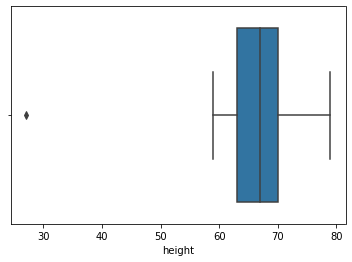

In [415]:
sns.boxplot(patients_copy['height'])

In [416]:
patients_copy[patients_copy['height']<40]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email_id,phone_number
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,2/18/1928,192.3,27,26.1,TimNeudorf@cuvox.de,334-515-7487


Height of 27 inches with a bmi of 26.1 is an inaccurate data.      
#### `Solution`: We are going to drop this row
#### Code

In [417]:
patients_copy=patients_copy[patients_copy['patient_id']!=5]

#### Test

In [418]:
patients_copy.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email_id,phone_number
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390,United States,7/10/1976,121.7,66,19.6,ZoeWellish@superrito.com,951-719-9170
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812,United States,4/3/1967,118.8,66,19.2,PamelaSHill@cuvox.de,217-569-3204
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467,United States,2/19/1980,177.8,71,24.8,JaeMDebord@gustr.com,402-363-6804
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,7/26/1951,220.9,70,31.7,PhanBaLiem@jourrapide.com,732-636-8246
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,Florida,32114,United States,8/31/1931,183.9,70,26.4,RafaelCardosoCosta@gustr.com,386-334-5237


## e. Inconsistency Issues
- For the state col sometimes full names are use and other times short forms are used
- Duplicate and not useful data in dataset
- Name and surname col is in lower case

### Define: Incorrect data type for auralin and novadra cols
`Solution`: Change Data type from object to Category
#### Code

In [419]:
treatment_copy['treatment']=treatment_copy['treatment'].astype('category')

#### Test

In [420]:
treatment_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 9 columns):
given_name          350 non-null object
surname             350 non-null object
hba1c_start         350 non-null float64
hba1c_end           350 non-null float64
hba1c_change        350 non-null float64
treatment           350 non-null category
lower_dosage        350 non-null int64
upper_dosage        350 non-null int64
adverse_reaction    35 non-null object
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 25.0+ KB


### Define: Incorrect data types for assigned_sex and birthdate columns
`Solution`: Change Data type from object to Category
#### Code

In [421]:
patients_copy['assigned_sex']=patients_copy['assigned_sex'].astype('category')
patients_copy['birthdate']=pd.to_datetime(patients_copy['birthdate'])

In [424]:
patients_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 0 to 502
Data columns (total 15 columns):
patient_id      502 non-null int64
assigned_sex    502 non-null category
given_name      502 non-null object
surname         502 non-null object
address         490 non-null object
city            490 non-null object
state           490 non-null object
zip_code        490 non-null object
country         490 non-null object
birthdate       502 non-null datetime64[ns]
weight          502 non-null float64
height          502 non-null int64
bmi             502 non-null float64
email_id        490 non-null object
phone_number    490 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 59.4+ KB


### Define: Name and surname col is in lower case
`Solution`: Initcap them

#### Code

In [425]:
treatment_copy['given_name']=treatment_copy['given_name'].str.title()
treatment_copy['surname']=treatment_copy['surname'].str.title()

#### Test

In [426]:
treatment_copy.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,lower_dosage,upper_dosage,adverse_reaction
0,Veronika,Jindrová,7.63,7.20,0.43,auralin,41,48,NaN
1,Skye,Gormanston,7.97,7.62,0.35,auralin,33,36,NaN
2,Sophia,Haugen,7.65,7.27,0.38,auralin,37,42,NaN
3,Eddie,Archer,7.89,7.55,0.34,auralin,31,38,NaN
4,Asia,Woźniak,7.76,7.37,0.39,auralin,30,36,NaN


### Define: Duplicate and not useful data in dataset
`Solution`: drop those rows

#### Code

In [427]:
# In treatment_copy dataframe
treatment_copy[treatment_copy.duplicated()]

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,lower_dosage,upper_dosage,adverse_reaction
6,Joseph,Day,7.7,7.19,0.51,auralin,29,36,hypoglycemia


In [428]:
treatment_copy.drop_duplicates(inplace=True)

In [429]:
# In patients_copy dataframe
patients_copy[patients_copy.duplicated(subset=['given_name','surname'])]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email_id,phone_number
229,230,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,johndoe@email.com,123-456-1234-5678
237,238,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,johndoe@email.com,123-456-1234-5678
244,245,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,johndoe@email.com,123-456-1234-5678
251,252,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,johndoe@email.com,123-456-1234-5678
277,278,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,johndoe@email.com,123-456-1234-5678


In [430]:
patients_copy.drop_duplicates(inplace=True)

In [431]:
patients_copy.drop_duplicates(subset=['given_name','surname'],inplace=True)

#### Test

In [432]:
treatment_copy.shape


(349, 9)

In [433]:
patients_copy.shape

(497, 15)

### Define: For the state col sometimes full names are use and other times short forms are used

#### Problem

In [353]:
patients_copy['state'].unique()

array(['California', 'Illinois', 'Nebraska', 'NJ', 'Florida', 'NV', 'CA',
       'MO', 'New York', 'MI', 'TN', 'VA', 'AL', 'OK', 'GA', 'MT', 'MA',
       'NY', 'NM', 'IL', 'LA', 'PA', 'CO', 'ME', 'WI', 'SD', 'MN', 'FL',
       'WY', 'OH', 'IA', 'NC', 'IN', 'CT', 'KY', 'DE', 'MD', 'AZ', 'TX',
       'NE', 'AK', 'ND', 'KS', 'MS', 'WA', 'SC', 'WV', 'RI', 'NH', 'OR',
       nan, 'VT', 'ID', 'DC', 'AR'], dtype=object)

 `Solution`: Replace California, Illinois, Nebraska and Florida with CA, IL, NE and FL

#### Code


In [354]:
patients_copy.replace(to_replace =["New Yoek","California", "Illinois","Nebraska","Florida"],  
                            value =["NY","CA","IL","NE","FL"]) 

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email_id,phone_number
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,CA,92390,United States,7/10/1976,121.7,66,19.6,ZoeWellish@superrito.com,951-719-9170
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,IL,61812,United States,4/3/1967,118.8,66,19.2,PamelaSHill@cuvox.de,217-569-3204
2,3,male,Jae,Debord,1493 Poling Farm Road,York,NE,68467,United States,2/19/1980,177.8,71,24.8,JaeMDebord@gustr.com,402-363-6804
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,7/26/1951,220.9,70,31.7,PhanBaLiem@jourrapide.com,732-636-8246
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,FL,32114,United States,8/31/1931,183.9,70,26.4,RafaelCardosoCosta@gustr.com,386-334-5237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,03852,United States,4/10/1959,181.1,72,24.6,MustafaLindstrom@jourrapide.com,207-477-0579
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341,United States,3/26/1948,239.6,70,34.4,RumanBisliev@gustr.com,928-284-4492
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110,United States,1/13/1971,171.2,67,26.8,JinkedeKeizer@teleworm.us,816-223-6007
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109,United States,2/13/1952,176.9,67,27.7,ChidaluOnyekaozulu@jourrapide.com,360-443-2060


#### Test

In [355]:
patients_copy.sample(10)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email_id,phone_number
89,90,male,Kwasi,Mensa,479 Elmwood Avenue,Tempe,AZ,85281,United States,10/5/1942,145.4,69,21.5,KwasiMensa@cuvox.de,480-967-6336
340,341,female,Minea,Lindgren,2272 Williams Avenue,Palmdale,California,93550,United States,1/10/1940,176.9,64,30.4,MineaLindgren@jourrapide.com,661-265-8708
427,428,female,Tecla,Onio,3730 Seth Street,Abilene,TX,79601,United States,12/16/1990,174.7,61,33.0,TeclaOnio@jourrapide.com,325-513-8964
266,267,female,Johanna,Dreher,3857 Straford Park,Whitesburg,KY,41858,United States,10/6/1948,187.0,61,35.3,JohannaDreher@superrito.com,606-632-4327
215,216,male,John,Doe,123 Main Street,New York,NY,12345,United States,1/1/1975,180.0,72,24.4,johndoe@email.com,123-456-1234-5678
25,26,male,Gregor,Bole,922 Chapmans Lane,Albuquerque,NM,87109,United States,6/19/1922,180.8,67,28.3,GregorBole@gustr.com,505-828-4955
332,333,male,Abel,Efrem,2333 Hidden Pond Road,Old Hickory,TN,37138,United States,2/15/1971,224.0,67,35.1,AbelEfrem@fleckens.hu,615-755-8235
343,344,female,Emy,Markus,288 Colony Street,Stamford,CT,06901,United States,1/30/1999,140.6,65,23.4,EmyMarkus@armyspy.com,203-251-3573
140,141,male,John,Teichelmann,631 Isaacs Creek Road,Decatur,IL,62522,United States,12/3/1958,214.1,72,29.0,JohnTeichelmann@dayrep.com,217-421-0935
36,37,female,Naja,Enoksen,2915 Lynn Avenue,Eau Claire,WI,54701,United States,11/26/1931,156.4,66,25.2,NajaEnoksen@fleckens.hu,715-562-7013


# Your cleaned data

In [357]:
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email_id,phone_number
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390,United States,7/10/1976,121.7,66,19.6,ZoeWellish@superrito.com,951-719-9170
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812,United States,4/3/1967,118.8,66,19.2,PamelaSHill@cuvox.de,217-569-3204
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467,United States,2/19/1980,177.8,71,24.8,JaeMDebord@gustr.com,402-363-6804
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,7/26/1951,220.9,70,31.7,PhanBaLiem@jourrapide.com,732-636-8246
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,Florida,32114,United States,8/31/1931,183.9,70,26.4,RafaelCardosoCosta@gustr.com,386-334-5237


In [116]:
treatment.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start,end,adverse_reaction
0,Veronika,Jindrová,7.63,7.20,0.43,auralin,41,48,NaN
1,Skye,Gormanston,7.97,7.62,0.35,auralin,33,36,NaN
2,Sophia,Haugen,7.65,7.27,0.38,auralin,37,42,NaN
3,Eddie,Archer,7.89,7.55,0.34,auralin,31,38,NaN
4,Asia,Woźniak,7.76,7.37,0.39,auralin,30,36,NaN


In [358]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 502
Data columns (total 15 columns):
patient_id      497 non-null int64
assigned_sex    497 non-null object
given_name      497 non-null object
surname         497 non-null object
address         485 non-null object
city            485 non-null object
state           485 non-null object
zip_code        485 non-null object
country         485 non-null object
birthdate       497 non-null object
weight          497 non-null float64
height          497 non-null int64
bmi             497 non-null float64
email_id        485 non-null object
phone_number    485 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 62.1+ KB


In [359]:
treatment_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 349
Data columns (total 9 columns):
given_name          349 non-null object
surname             349 non-null object
hba1c_start         349 non-null float64
hba1c_end           349 non-null float64
hba1c_change        349 non-null float64
treatment           349 non-null category
lower_dosage        349 non-null int64
upper_dosage        349 non-null int64
adverse_reaction    34 non-null object
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 25.0+ KB


### What is Assessing Data?

The data analysis process consists of the following steps

1. Asking Questions
2. Data Wrangling<br><br>
    a. Gathering Data
            i.   CSV files
            ii.  APIs
            iii. Web Scraping
            iv.  Databases
    b. <b>Assessing Data</b><br>
    c. Cleaning Data<br><br>
3. Exploratory Data Analysis
4. Drawing Conclusion
5. Comunicating Results
    

### Assessing Data

In this step, the data is to be understood more deeply. Before implementing methods to clean it, you will definitely need to have a better idea about what the data is about.

### Types of Unclean Data

There are 2 kinds of unclean data

1. <u>Dirty Data</u> (Data with Quality issues):<br>
    Dirty data, also known as low quality data. Low quality data has content issues.<br>
2. <u>Messy Data</u> (Data with tidiness issues)<br>
    Messy data, also known as untidy data. Untidy data has structural issues.

### 1. Dirty Data

When the data has following kinds of issues:

1. Duplicated data
2. Missing Data
3. Corrupt Data
4. Inaccurate Data

This kind of data is known as Dirty data

### 2. Messy Data

When the data has structural issue is it known as Messy or untidy data.

Tidy data has the following properties:

1. Each variable forms a column
2. Each observation forms a row
3. Each observational unit forms a table

If a data violates any one of the above it is known as untidy data

Example:

<img src="untidy.png">

### Types of Assessment

There are 2 types of assessment styles

1. Manual - Looking through the data manually in google sheets
2. Programmatic - By using pandas functions such as info(), describe() or sample()

### Steps in Assessment

There are 2 steps involved in Assessment

1. Discover
2. Document

### Data Quality Dimensions

1. Completeness Issues
2. Validity Issues
3. Accuracy Issues
4. Consistency Issues